### 手把手教你用TensorFlow进行手写数字识别

###### 目录

手写体数字MNIST数据集介绍

MNIST Softmax网络介绍

实战MNIST Softmax网络

MNIST CNN网络介绍

实战MNIST CNN网络

### 一、MNIST数据集介绍

###### 1.MNIST数据集

MNIST是一套手写体数字的图像数据集，包括60000个训练样例和10000个测试样例，由纽约大学的Yann LeCun等人维护。

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)


more info:http://yann.lecun.com/exdb/mnist/

###### 2.MNIST手写体数字介绍


MNIST图像数据集使用形如[28,28]的二阶数组来表示每个手写体数字，数组中的每个元素对应一个像素点，即每张图像大小固定为28x28像素

<img src="./imgs/1.jpg" width=650>

MNIST数据集中的图像都是256阶灰度图，即灰度值0表示白色（背景），255表示黑色（前景），使用取值为[0,255]的uint8数据了诶下表示图像。为了加速训练，我们需要做数据规范化，将灰度值缩放为[0,1]的float32数据类型

<img src="./imgs/2.jpg" width=650>

由于每张图像的尺寸都是28x28像素，为了方便连续存储，我们可以将形如[28,28]的二阶数组“摊平”成形如[784,]的一阶数组，可以表示256*256*...*256 = 256^784张不同的图像。

但这些图像并非每一张都代表有效的手写体数字，其中绝大部分都是如下的噪声图:


<img src="./imgs/3.jpg">

###### 3.下载和读取MNIST数据集

###### a.使用tf.contrib.learn模块加载MNIST数据集
一个曾广泛使用的方法，但如今已经被废弃的（deprecated）方法：

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 导入数据
mnist = input_data.read_data_sets("./data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


因为，tf.contrib.learn整个模型均已被废弃了

###### b.使用Keras加载MNIST数据集
**tf.kera.datasets.mnist.load_data(path=‘mnist.npz’)**

In [2]:
from keras.datasets import mnist
path = "D:\\mnist data\mnist.npz"
(x_train,y_train),(x_test,y_test) = mnist.load_data(path)

Using TensorFlow backend.


In [3]:
# 查看mnist data的维度
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# 查看数据
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

###### 4.MNIST数据集 样例可视化

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以三行5列子图形式展示
    plt.tight_layout # 自动适配子图尺寸
    plt.imshow(x_train[i],cmap="Greys") # 使用灰色显示像素灰度值
    plt.title("Label:{}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记

### 二、MNIST Softmax网络介绍

###### 1.前置知识

**a.感知机模型**

<img src="./imgs/4.jpg" width=650>

**b.神经网络**

<img src="./imgs/5.jpg" width=650>

**c.线性不可分**

<img src="./imgs/6.jpg" width=650>

**d.激活函数（Activation Function）**

<img src="./imgs/7.jpg" width=650>

**e.全连接层（fully connected layers，FC）**

<img src="./imgs/8.jpg" width=650>

###### 2.MNIST Softmax网络

将表示手写数字的形如[784]的一维向量作为输入；中间定义2层512个神经元隐藏层，具备一定的模型复杂度，足以识别手写体数字；最后定义1层10个神经元的全连接层，用于输出10个不同类别的“概率”。

<img src="./imgs/9.jpg" width=650>

### 三、实战MNIST Softmax网络

<img src="./imgs/10.jpg" width=650>

###### 1.加载MNIST数据集

In [6]:
from keras.datasets import mnist
path = "D:\\mnist data\mnist.npz"

(x_train,y_train),(x_test,y_test) = mnist.load_data(path)

In [7]:
print(x_train.shape,type(x_train))
print(y_train.shape,type(y_train))
print(x_test.shape,type(x_test))
print(y_test.shape,type(y_test))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>
(10000, 28, 28) <class 'numpy.ndarray'>
(10000,) <class 'numpy.ndarray'>


###### 2.数据规范化

In [8]:
# 将图像本身从[28,28]转换为[784,]
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)

print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


In [9]:
# 将数据类型转换为float32，然后将其归一化处理
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
# 数据归一化
X_train /= 255
X_test /= 255

In [ ]:
# 查看数据
print(X_train[0])
print(y_train[0])

###### 3.统计训练数据中各标签的数量

In [11]:
import numpy as np
import matplotlib.pyplot as plt

label,count = np.unique(y_train,return_counts=True)
print(label,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


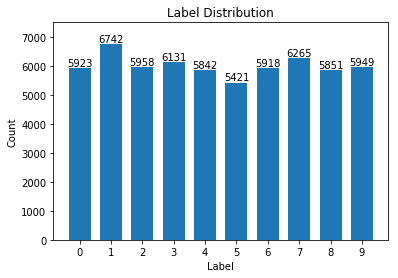

In [12]:
fig = plt.figure()
plt.bar(label,count,width=0.7,align="center")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,"%d" %b,ha="center",va="bottom",fontsize=10)
    
plt.show()

###### 4.one-hot 编码

**a.几种编码方式的对比**

| Binary | Gray code | One-hot  |
| ------ | --------- | -------- |
| 000    | 000       | 00000001 |
| 001    | 001       | 00000010 |
| 010    | 011       | 00000100 |
| 011    | 010       | 00001000 |
| 100    | 110       | 00010000 |
| 101    | 111       | 00100000 |
| 110    | 101       | 01000000 |
| 111    | 100       | 10000000 |


**b.对标签数据进行one-hot编码**

In [13]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (60000,)
Shape after one-hot encoding: (60000, 10)


In [14]:
# 具体查看一下数据
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


###### 5.使用Keras sequential model来实现神经网络

**a.定义模型 softmax网络层**

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation

model = Sequential()

model.add(Dense(512,input_shape=(784,)))
model.add(Activation("relu"))

model.add(Dense(512))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


**b.编译模型**


[model.compile()](https://keras.io/models/sequential/#compile)

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```

In [16]:
# loss:categorical_crossentropy 损失器采用交叉熵损失函数
# metrics:accuracy 衡量指标采用准确率
# optimizer:adam 优化器采用adam,结合AdaGrad和RMSProp两种优化算法的优点
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

**c.训练模型，并将指标保存到history中**

[model.fit()](https://keras.io/models/sequential/#fit)

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
```

In [17]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 5s - loss: 0.2158 - acc: 0.9371 - val_loss: 0.1152 - val_acc: 0.9637
Epoch 2/5
 - 5s - loss: 0.0815 - acc: 0.9745 - val_loss: 0.0856 - val_acc: 0.9727
Epoch 3/5
 - 6s - loss: 0.0505 - acc: 0.9841 - val_loss: 0.0762 - val_acc: 0.9758
Epoch 4/5
 - 6s - loss: 0.0361 - acc: 0.9882 - val_loss: 0.0672 - val_acc: 0.9782
Epoch 5/5
 - 5s - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0772 - val_acc: 0.9772


**d.可视化指标**

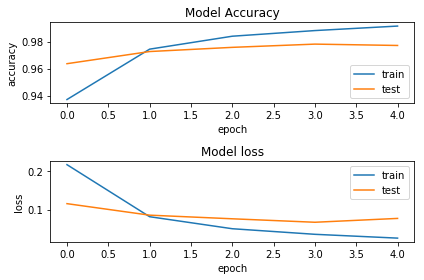

In [18]:
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="lower right")

plt.subplot(2,1,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper right")
plt.tight_layout()

plt.show()

**e.保存模型**

[model.save()](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)

You can use `model.save(filepath)` to save a Keras model into a single **HDF5 file** which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

You can then use `keras.models.load_model(filepath)` to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).

In [19]:
import os
import tensorflow.gfile as gfile

save_dir = "./model/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = "keras_mnist.h5"
model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print("Saved trained model at %s" % model_path)

Saved trained model at ./model/keras_mnist.h5


**f.加载模型**

In [20]:
from keras.models import load_model

mnist_model = load_model(model_path)

**g.统计模型在测试集上的分类结果**

In [21]:
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss:{}".format(loss_and_metrics[0]))
print("Test Accuracy:{}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss:0.07715968866588664
Test Accuracy:97.72%
Classified correctly count: 9772
Classified incorrectly count: 228


### 四、MNIST CNN网络介绍

###### 1.CNN简介

<img src="./imgs/11.jpg" width=650>

###### 2.卷积

<img src="./imgs/12.jpg" width=650>

###### 3.卷积层(Convolutional Layer,conv)

<img src="./imgs/13.jpg" width=650>

###### 4.池化层(Pooling)

<img src="./imgs/14.jpg" width=650>

###### 5.Dropout层

<img src="./imgs/15.jpg" width=650>

###### 6.Flatten

<img src="./imgs/16.jpg" width=650>

### 五、实战MNIST CNN网络

**MNIST CNN示意图**

<img src="./imgs/17.jpg" width=650>

###### 1.加载MNIST数据集

In [22]:
from keras.datasets import mnist
path = "D:\mnist data\mnist.npz"

(x_train,y_train),(x_test,y_test) = mnist.load_data(path)

print(x_train.shape,type(x_train))
print(y_train.shape,type(y_train))
print(x_test.shape,type(x_test))
print(y_test.shape,type(y_test))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>
(10000, 28, 28) <class 'numpy.ndarray'>
(10000,) <class 'numpy.ndarray'>


###### 2.数据处理：规范化

`channels_last` corresponds to inputs with shape  (batch, height, width, channels) while `channels_first` corresponds to inputs with shape  (batch, channels, height, width).

It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be `channels_last`.

In [23]:
from keras import backend as K

img_rows,img_cols = 28,28

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    
print(x_train.shape,type(x_train))
print(x_test.shape,type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


In [24]:
# 将数据类型转换为float32
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
# 数据归一化
X_train /= 255
X_test /= 255

###### 3.统计训练数据中各标签数量

In [25]:
import numpy as np
import matplotlib.pyplot as plt

label,count = np.unique(y_train,return_counts=True)
print(label,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


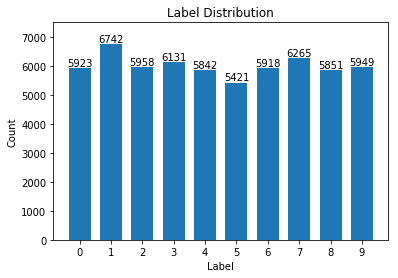

In [26]:
fig = plt.figure()

plt.bar(label,count,width=0.7,align="center")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,"%d" %b,ha="center",va="bottom",fontsize=10)

plt.show()

###### 4.数据处理:one-hot 编码

In [27]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (60000,)
Shape after one-hot encoding: (60000, 10)


In [28]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


###### 5.MNIST CNN网络实战

**a.Keras sequential model定义MNIST CNN网络**

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model = Sequential()

# Feature Extraction
# 第一层卷积，32个3*3的卷积核，激活函数使用relu
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape))

# 第二层卷积，64个3*3的卷积核，激活函数使用relu
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

# 最大池化层，池化窗口为2*2
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout 25%的输入神经元
model.add(Dropout(0.25))

# 将Pooled feature map摊平后输入全连接网络
model.add(Flatten())

# Classification
# 全联接层
model.add(Dense(128,activation="relu"))

# Dropout 50%的输入神经元
model.add(Dropout(0.5))

# 使用softmax激活函数做多分类，输出各数字的概率
model.add(Dense(n_classes,activation="softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
# 查看MNIST CNN模型网络结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

**b.编译模型**

[model.compile()](https://keras.io/models/sequential/#compile)

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```

In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

**c.训练模型，并指标保存到history中**

[model.fit()](https://keras.io/models/sequential/#fit)

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
```

In [32]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 63s - loss: 0.2449 - acc: 0.9256 - val_loss: 0.0553 - val_acc: 0.9823
Epoch 2/5
 - 63s - loss: 0.0841 - acc: 0.9742 - val_loss: 0.0340 - val_acc: 0.9881
Epoch 3/5
 - 63s - loss: 0.0644 - acc: 0.9811 - val_loss: 0.0312 - val_acc: 0.9889
Epoch 4/5
 - 68s - loss: 0.0522 - acc: 0.9838 - val_loss: 0.0316 - val_acc: 0.9907
Epoch 5/5
 - 64s - loss: 0.0440 - acc: 0.9864 - val_loss: 0.0300 - val_acc: 0.9902


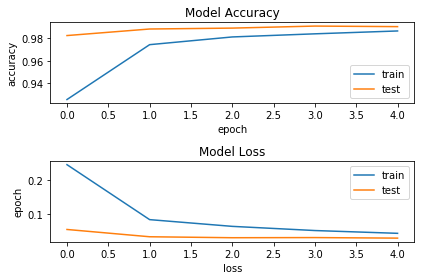

In [33]:
# 将history可视化
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="lower right")

plt.subplot(2,1,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend(["train","test"],loc="upper right")
plt.tight_layout()

plt.show()

**d.保存模型**

[model.save()](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)

You can use `model.save(filepath)` to save a Keras model into a single **HDF5 file** which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

You can then use `keras.models.load_model(filepath)` to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).

In [34]:
import os
import tensorflow.gfile as gfile

save_dir = "./model/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = "keras_mnist.h5"
model_path = os.path.join(save_dir,model_name)
model.save(model_path)

print("Saved trained model at %s"% model_path)

Saved trained model at ./model/keras_mnist.h5


**e.加载模型**

In [35]:
from keras.models import load_model

mnist_model = load_model(model_path)

**f.统计模型在测试集上的分类结果**

In [ ]:
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss:{}".format(loss_and_metrics[0]))
print("Test Accuracy:{}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("Classified correctly count:{}".format(len(correct_indices)))
print("Classified incorrectly count:{}".format(len(incorrect_indices)))

Test Loss:0.02999471065380276
Test Accuracy:99.02%
